# 데이터 불러오기

In [231]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np

In [232]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KDT/본 프로젝트


In [233]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [234]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기'],
      dtype='object')

In [235]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [236]:
# 신촌동만 남김
df_sin = df[df.행정동=='신촌동']

# 신촌동에 중분류 업종 중 '주유', '여행', '기술', '정비/수리' 는 18년도에만 매출이 찍혀있으므로, 제외하도록 하자.
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '주유'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '여행'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '기술'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '정비/수리'].index).reset_index().drop('index', axis=1)

# df_sin

In [237]:
# 분기별 업종별 매출금액 합치기

df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()
df_sin_quarter

<ipython-input-237-aad5d98914bf>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,교육,독서실,신촌동,169054586,18,1,0
1,2017-1,서비스,교육,스포츠강습,신촌동,795837623,23,1,0
2,2017-1,서비스,교육,예술학원,신촌동,1162571945,28,1,0
3,2017-1,서비스,교육,외국어학원,신촌동,3196308868,24,2,2
4,2017-1,서비스,교육,일반교습학원,신촌동,762815407,9,1,3
...,...,...,...,...,...,...,...,...,...
1339,2022-4,외식,식사류,패스트푸드점,신촌동,3057584360,83,0,4
1340,2022-4,외식,식사류,한식음식점,신촌동,29617724330,435,8,12
1341,2022-4,외식,주류,호프-간이주점,신촌동,7366806532,171,1,6
1342,2022-4,외식,카페/베이커리,제과점,신촌동,1302230221,48,3,2


# 반찬가게

In [238]:
# 반찬가게만 남기기
sin_banchan = df_sin_quarter[df_sin_quarter.업종명 == '반찬가게'].reset_index().drop('index', axis=1)
sin_banchan

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,소매,유통,반찬가게,신촌동,253252780,21,0,0
1,2017-2,소매,유통,반찬가게,신촌동,596272962,19,0,2
2,2017-3,소매,유통,반찬가게,신촌동,502820725,19,1,0
3,2017-4,소매,유통,반찬가게,신촌동,568056174,19,0,0
4,2018-1,소매,유통,반찬가게,신촌동,439501566,20,1,0
5,2018-2,소매,유통,반찬가게,신촌동,570652239,20,0,0
6,2018-3,소매,유통,반찬가게,신촌동,464623074,20,1,1
7,2018-4,소매,유통,반찬가게,신촌동,1511827204,20,1,1
8,2019-1,소매,유통,반찬가게,신촌동,42705033,17,0,1
9,2019-2,소매,유통,반찬가게,신촌동,65645629,19,2,0


## 지표 만들기 : 성장성, 시장성, 순점포증감률

In [239]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

sin_banchan['성장성'] = sin_banchan['분기당_매출_금액'] / sin_banchan['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
sin_banchan['성장성'][0] = 1

sin_banchan

<ipython-input-239-39ada59b8ce1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_banchan['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,소매,유통,반찬가게,신촌동,253252780,21,0,0,1.000000
1,2017-2,소매,유통,반찬가게,신촌동,596272962,19,0,2,2.354458
2,2017-3,소매,유통,반찬가게,신촌동,502820725,19,1,0,0.843273
3,2017-4,소매,유통,반찬가게,신촌동,568056174,19,0,0,1.129739
4,2018-1,소매,유통,반찬가게,신촌동,439501566,20,1,0,0.773694
5,2018-2,소매,유통,반찬가게,신촌동,570652239,20,0,0,1.298408
6,2018-3,소매,유통,반찬가게,신촌동,464623074,20,1,1,0.814197
7,2018-4,소매,유통,반찬가게,신촌동,1511827204,20,1,1,3.253879
8,2019-1,소매,유통,반찬가게,신촌동,42705033,17,0,1,0.028247
9,2019-2,소매,유통,반찬가게,신촌동,65645629,19,2,0,1.537187


In [240]:
# 개업률, 폐업률, 순점포증감률 추가

sin_banchan['개업률'] = (sin_banchan['개업점포수'] / sin_banchan['총 점포수']) * 100
sin_banchan['폐업률'] = (sin_banchan['폐업점포수'] / sin_banchan['총 점포수']) * 100
sin_banchan['순점포증감률'] = ((sin_banchan['개업점포수'] - sin_banchan['폐업점포수']) / sin_banchan['총 점포수']) * 100

# sin_banchan

In [241]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_seo = df[df['자치구'] == '서대문구']

# 자치구 분기별 업종별 매출금액 합치기
df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 반찬가게만 남기기
seo_banchan = df_seo_quarter[df_seo_quarter['업종명'] == '반찬가게'].reset_index()

################################################################################################################################################################################################

sin_banchan['시장성'] = (sin_banchan['분기당_매출_금액'] / sin_banchan['총 점포수']) - (seo_banchan['분기당_매출_금액'] / seo_banchan['총 점포수'])

sin_banchan = sin_banchan[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
sin_banchan

<ipython-input-241-fedc67a201ca>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,반찬가게,253252780,1.000000,0.000000,-2.781418e+07
1,2017-2,반찬가게,596272962,2.354458,-10.526316,1.035614e+07
2,2017-3,반찬가게,502820725,0.843273,5.263158,4.880673e+05
3,2017-4,반찬가게,568056174,1.129739,0.000000,1.091515e+06
4,2018-1,반찬가게,439501566,0.773694,5.000000,-1.028010e+07
5,2018-2,반찬가게,570652239,1.298408,0.000000,-5.139073e+06
6,2018-3,반찬가게,464623074,0.814197,0.000000,-1.227974e+07
7,2018-4,반찬가게,1511827204,3.253879,0.000000,2.135887e+07
8,2019-1,반찬가게,42705033,0.028247,-5.882353,-2.969063e+07
9,2019-2,반찬가게,65645629,1.537187,10.526316,-2.721471e+07


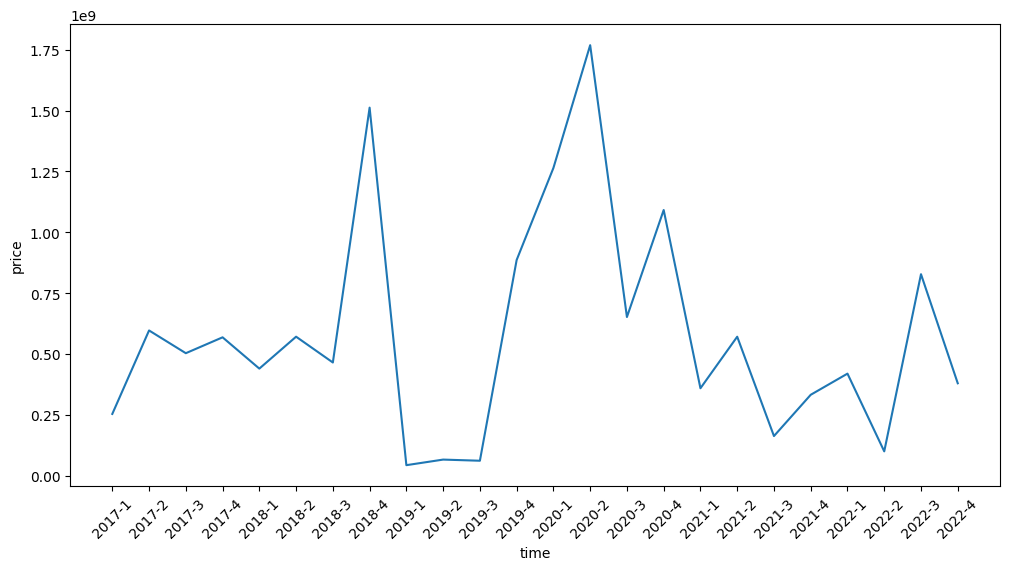

In [242]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=sin_banchan['분기'], y=sin_banchan['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [243]:
### X / y 데이터 생성
X = sin_banchan[['성장성', '시장성', '순점포증감률']]
y = sin_banchan.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

          성장성           시장성     순점포증감률
0    1.000000 -2.781418e+07   0.000000
1    2.354458  1.035614e+07 -10.526316
2    0.843273  4.880673e+05   5.263158
3    1.129739  1.091515e+06   0.000000
4    0.773694 -1.028010e+07   5.000000
5    1.298408 -5.139073e+06   0.000000
6    0.814197 -1.227974e+07   0.000000
7    3.253879  2.135887e+07   0.000000
8    0.028247 -2.969063e+07  -5.882353
9    1.537187 -2.721471e+07  10.526316
10   0.928258 -3.128562e+07   9.523810
11  14.535823 -3.810712e+07   8.695652
12   1.426895  8.146730e+06 -11.764706
13   1.399256  2.029983e+07  14.285714
14   0.368357 -3.715953e+07  -5.000000
15   1.674979 -3.417501e+07   0.000000
16   0.328760 -4.008365e+07  -5.263158
17   1.590467 -3.433309e+07   0.000000
18   0.284536 -5.191749e+07   0.000000
19   2.044794 -4.806462e+07   5.000000
20   1.261783 -4.511257e+07   0.000000
21   0.237420 -6.446988e+07   0.000000
22   8.320364 -2.896272e+07   5.000000
23   0.458297 -5.571703e+07 -10.526316
-------------------------

In [244]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [245]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [246]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [247]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.57157146 0.41369773 0.64354839]
 [0.02964312 0.1019804  0.0475382 ]]


In [248]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [249]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_35 (LSTM)              (None, 32)                12416     
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [250]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1517
Epoch 1: val_loss improved from inf to 0.32052, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1517 - val_loss: 0.3205
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1446
Epoch 2: val_loss improved from 0.32052 to 0.30972, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.1446 - val_loss: 0.3097
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1378
Epoch 3: val_loss improved from 0.30972 to 0.29928, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.1378 - val_loss: 0.2993
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1314
Epoch 4: val_loss improved from 0.29928 to 0.28916, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.1314 - val_loss: 0.2892
Epoch 5/100
1/1 [================

In [251]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 591ms/step
[[0.26738268]
 [0.26214197]
 [0.27841774]
 [0.24889788]
 [0.26097026]]


In [252]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.167602,0.267383
2022-1,0.217955,0.262142
2022-2,0.032877,0.278418
2022-3,0.454689,0.248898
2022-4,0.194978,0.260970


In [253]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_banchan의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.167602,0.267383,331950338,504151200.0,-172200862.0
2022-1,0.217955,0.262142,418849204,495106848.0,-76257644.0
2022-2,0.032877,0.278418,99442974,523195392.0,-423752418.0
2022-3,0.454689,0.248898,827401705,472250336.0,355151369.0
2022-4,0.194978,0.260970,379195770,493084736.0,-113888966.0


### 결과

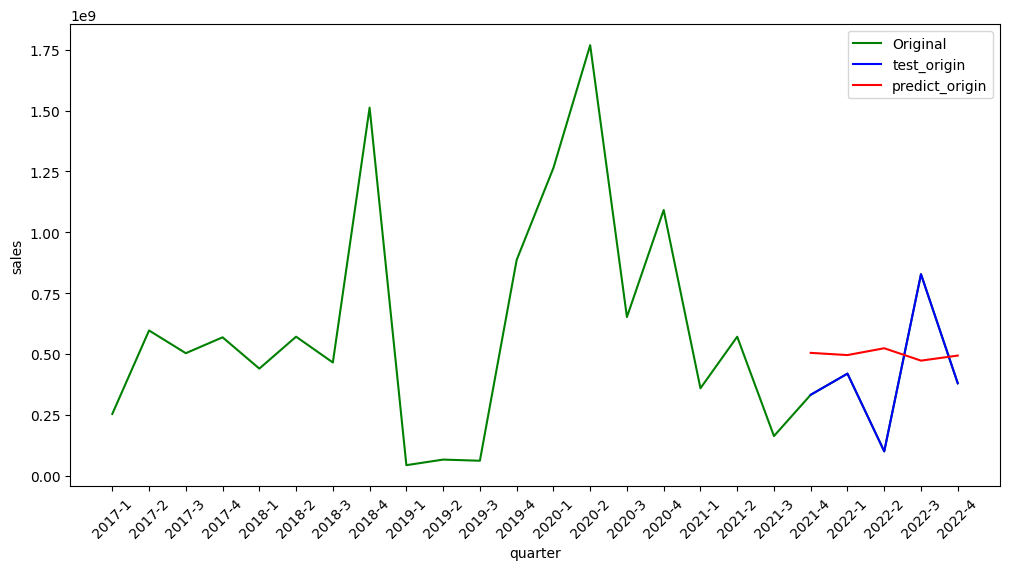

In [254]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [255]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -8.618970e+07
std      2.815113e+08
min     -4.237524e+08
25%     -1.722009e+08
50%     -1.138890e+08
75%     -7.625764e+07
max      3.551514e+08
dtype: float64

In [256]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.27230656]]
--------------------------------------------------------------------------------
예측된 매출  : 512648800.0 


## 23년 1분기 성장성 예측

In [257]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_banchan[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_banchan.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성     순점포증감률
0    253252780 -2.781418e+07   0.000000
1    596272962  1.035614e+07 -10.526316
2    502820725  4.880673e+05   5.263158
3    568056174  1.091515e+06   0.000000
4    439501566 -1.028010e+07   5.000000
5    570652239 -5.139073e+06   0.000000
6    464623074 -1.227974e+07   0.000000
7   1511827204  2.135887e+07   0.000000
8     42705033 -2.969063e+07  -5.882353
9     65645629 -2.721471e+07  10.526316
10    60936100 -3.128562e+07   9.523810
11   885756381 -3.810712e+07   8.695652
12  1263881768  8.146730e+06 -11.764706
13  1768494304  2.029983e+07  14.285714
14   651438035 -3.715953e+07  -5.000000
15  1091145021 -3.417501e+07   0.000000
16   358725375 -4.008365e+07  -5.263158
17   570540993 -3.433309e+07   0.000000
18   162339239 -5.191749e+07   0.000000
19   331950338 -4.806462e+07   5.000000
20   418849204 -4.511257e+07   0.000000
21    99442974 -6.446988e+07   0.000000
22   827401705 -2.896272e+07   5.000000
23   379195770 -5.571703e+07 -10.526316


In [258]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [259]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [260]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.45468858 0.41369773 0.64354839]
 [0.19497788 0.1019804  0.0475382 ]]


In [261]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [262]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_37 (LSTM)              (None, 32)                12416     
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [263]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1195
Epoch 1: val_loss improved from inf to 0.00893, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1195 - val_loss: 0.0089
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1147
Epoch 2: val_loss improved from 0.00893 to 0.00709, saving model to stock_model.h5
1/1 [==============================] - 0s 56ms/step - loss: 0.1147 - val_loss: 0.0071
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1102
Epoch 3: val_loss improved from 0.00709 to 0.00552, saving model to stock_model.h5
1/1 [==============================] - 0s 60ms/step - loss: 0.1102 - val_loss: 0.0055
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1061
Epoch 4: val_loss improved from 0.00552 to 0.00420, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.1061 - val_loss: 0.0042
Epoch 5/100
1/1 [=================

In [264]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 596ms/step
[[0.06844371]
 [0.07079658]
 [0.07313632]
 [0.06790458]
 [0.07028931]]


In [265]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.139000,0.068444
2022-1,0.085027,0.070797
2022-2,0.014418,0.073136
2022-3,0.571571,0.067905
2022-4,0.029643,0.070289


In [266]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 3].values       # 성장성이 sin_banchan의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.139000,0.068444,2.044794,1.021200,1.023595
2022-1,0.085027,0.070797,1.261783,1.055334,0.206449
2022-2,0.014418,0.073136,0.237420,1.089278,-0.851859
2022-3,0.571571,0.067905,8.320364,1.013378,7.306985
2022-4,0.029643,0.070289,0.458297,1.047975,-0.589678


### 결과

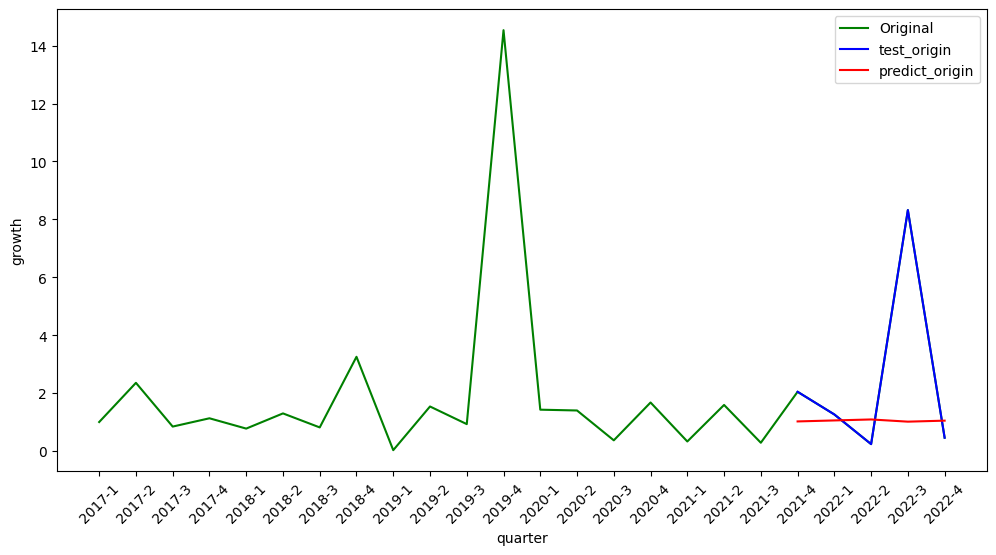

In [267]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [268]:
## error의 요약 통계량
error.describe()

count    5.000000
mean     1.419098
std      3.372187
min     -0.851859
25%     -0.589678
50%      0.206449
75%      1.023595
max      7.306985
dtype: float64

In [269]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 18ms/step
[[0.06725068]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0038917064666748 


## 23년 1분기 시장성 예측

In [270]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_banchan[['성장성', '분기당_매출_금액', '순점포증감률']]
y = sin_banchan.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

          성장성   분기당_매출_금액     순점포증감률
0    1.000000   253252780   0.000000
1    2.354458   596272962 -10.526316
2    0.843273   502820725   5.263158
3    1.129739   568056174   0.000000
4    0.773694   439501566   5.000000
5    1.298408   570652239   0.000000
6    0.814197   464623074   0.000000
7    3.253879  1511827204   0.000000
8    0.028247    42705033  -5.882353
9    1.537187    65645629  10.526316
10   0.928258    60936100   9.523810
11  14.535823   885756381   8.695652
12   1.426895  1263881768 -11.764706
13   1.399256  1768494304  14.285714
14   0.368357   651438035  -5.000000
15   1.674979  1091145021   0.000000
16   0.328760   358725375  -5.263158
17   1.590467   570540993   0.000000
18   0.284536   162339239   0.000000
19   2.044794   331950338   5.000000
20   1.261783   418849204   0.000000
21   0.237420    99442974   0.000000
22   8.320364   827401705   5.000000
23   0.458297   379195770 -10.526316
---------------------------------------------------------------------------

In [271]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [272]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [273]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.57157146 0.45468858 0.64354839]
 [0.02964312 0.19497788 0.0475382 ]]


In [274]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [275]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_39 (LSTM)              (None, 32)                12416     
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [276]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4196
Epoch 1: val_loss improved from inf to 0.32131, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4196 - val_loss: 0.3213
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4079
Epoch 2: val_loss improved from 0.32131 to 0.31040, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.4079 - val_loss: 0.3104
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3965
Epoch 3: val_loss improved from 0.31040 to 0.29976, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3965 - val_loss: 0.2998
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3853
Epoch 4: val_loss improved from 0.29976 to 0.28936, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.3853 - val_loss: 0.2894
Epoch 5/100
1/1 [=================

In [277]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 559ms/step
[[0.42626595]
 [0.42638266]
 [0.46918646]
 [0.41337934]
 [0.4545582 ]]


In [278]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.191140,0.426266
2022-1,0.225534,0.426383
2022-2,0.000000,0.469186
2022-3,0.413698,0.413379
2022-4,0.101980,0.454558


In [279]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 5].values       # 시장성이 sin_banchan의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.191140,0.426266,-4.806462e+07,-27884010.0,-2.018061e+07
2022-1,0.225534,0.426383,-4.511257e+07,-27873992.0,-1.723858e+07
2022-2,0.000000,0.469186,-6.446988e+07,-24200196.0,-4.026969e+07
2022-3,0.413698,0.413379,-2.896272e+07,-28990052.0,2.732904e+04
2022-4,0.101980,0.454558,-5.571703e+07,-25455722.0,-3.026131e+07


### 결과

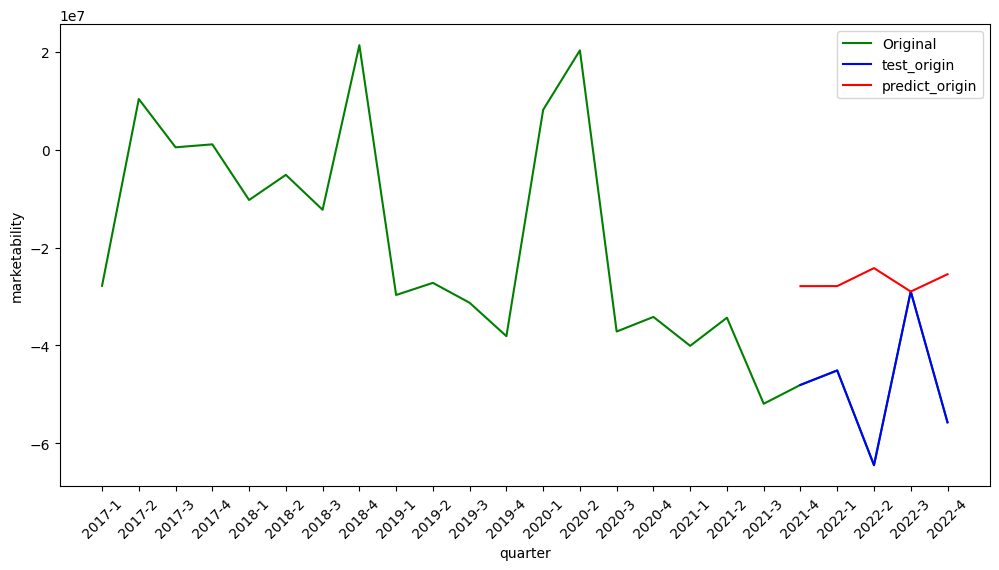

In [280]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [281]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -2.158457e+07
std      1.510259e+07
min     -4.026969e+07
25%     -3.026131e+07
50%     -2.018061e+07
75%     -1.723858e+07
max      2.732904e+04
dtype: float64

In [282]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.4847006]]
--------------------------------------------------------------------------------
예측된 시장성  : -22868638.0 


## 23년 1분기 순점포증감률 예측

In [283]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 시장성 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_banchan[['성장성', '분기당_매출_금액', '시장성']]
y = sin_banchan.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

          성장성   분기당_매출_금액           시장성
0    1.000000   253252780 -2.781418e+07
1    2.354458   596272962  1.035614e+07
2    0.843273   502820725  4.880673e+05
3    1.129739   568056174  1.091515e+06
4    0.773694   439501566 -1.028010e+07
5    1.298408   570652239 -5.139073e+06
6    0.814197   464623074 -1.227974e+07
7    3.253879  1511827204  2.135887e+07
8    0.028247    42705033 -2.969063e+07
9    1.537187    65645629 -2.721471e+07
10   0.928258    60936100 -3.128562e+07
11  14.535823   885756381 -3.810712e+07
12   1.426895  1263881768  8.146730e+06
13   1.399256  1768494304  2.029983e+07
14   0.368357   651438035 -3.715953e+07
15   1.674979  1091145021 -3.417501e+07
16   0.328760   358725375 -4.008365e+07
17   1.590467   570540993 -3.433309e+07
18   0.284536   162339239 -5.191749e+07
19   2.044794   331950338 -4.806462e+07
20   1.261783   418849204 -4.511257e+07
21   0.237420    99442974 -6.446988e+07
22   8.320364   827401705 -2.896272e+07
23   0.458297   379195770 -5.571703e+07


In [284]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [285]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [286]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.57157146 0.45468858 0.41369773]
 [0.02964312 0.19497788 0.1019804 ]]


In [287]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [288]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_41 (LSTM)              (None, 32)                12416     
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [289]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3918
Epoch 1: val_loss improved from inf to 0.26334, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3918 - val_loss: 0.2633
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3791
Epoch 2: val_loss improved from 0.26334 to 0.25419, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.3791 - val_loss: 0.2542
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3666
Epoch 3: val_loss improved from 0.25419 to 0.24528, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.3666 - val_loss: 0.2453
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3545
Epoch 4: val_loss improved from 0.24528 to 0.23658, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.3545 - val_loss: 0.2366
Epoch 5/100
1/1 [================

In [290]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 570ms/step
[[0.3131448 ]
 [0.26478064]
 [0.2905289 ]
 [0.26645878]
 [0.2792733 ]]


In [291]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.643548,0.313145
2022-1,0.451613,0.264781
2022-2,0.451613,0.290529
2022-3,0.643548,0.266459
2022-4,0.047538,0.279273


In [292]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_banchan의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.643548,0.313145,5.000000,-3.607152,8.607152
2022-1,0.451613,0.264781,0.000000,-4.867059,4.867059
2022-2,0.451613,0.290529,0.000000,-4.196306,4.196306
2022-3,0.643548,0.266459,5.000000,-4.823343,9.823343
2022-4,0.047538,0.279273,-10.526316,-4.489519,-6.036797


### 결과

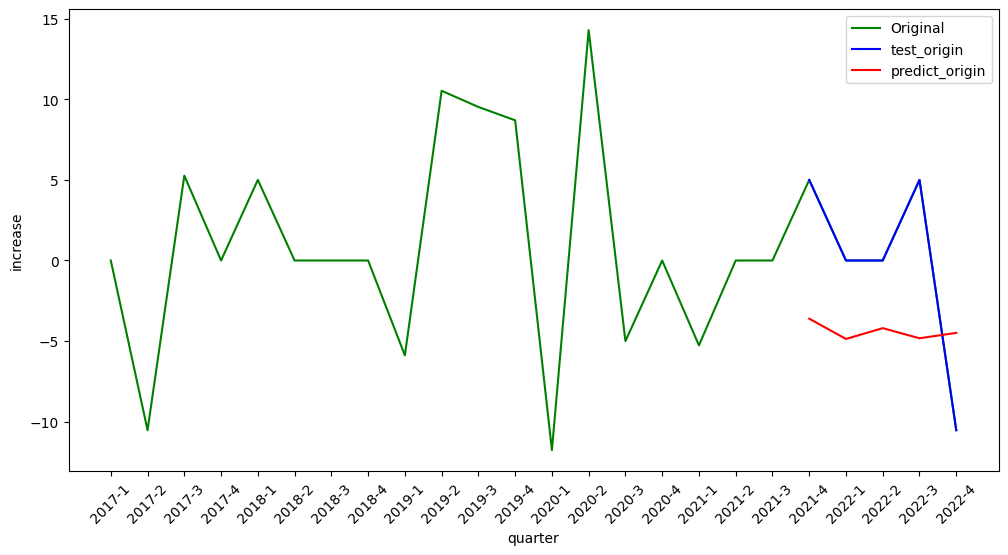

In [293]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [294]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     4.291413
std      6.249804
min     -6.036797
25%      4.196306
50%      4.867059
75%      8.607152
max      9.823343
dtype: float64

In [295]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 17ms/step
[[0.36750844]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.1909565925598145 


## 원본 데이터에 예측값 추가하기

In [296]:
print(sales)
print(growth)
print(marketability)
print(increase)

512648800.0
1.0038917
-22868638.0
-2.1909566


In [297]:
sin_banchan.loc[24] = ['2023-1', '반찬가게', sales, growth, increase, marketability]

<ipython-input-297-c292abd581f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_banchan.loc[24] = ['2023-1', '반찬가게', sales, growth, increase, marketability]


In [298]:
sin_banchan

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,반찬가게,2.532528e+08,1.000000,0.000000,-2.781418e+07
1,2017-2,반찬가게,5.962730e+08,2.354458,-10.526316,1.035614e+07
2,2017-3,반찬가게,5.028207e+08,0.843273,5.263158,4.880673e+05
3,2017-4,반찬가게,5.680562e+08,1.129739,0.000000,1.091515e+06
4,2018-1,반찬가게,4.395016e+08,0.773694,5.000000,-1.028010e+07
5,2018-2,반찬가게,5.706522e+08,1.298408,0.000000,-5.139073e+06
6,2018-3,반찬가게,4.646231e+08,0.814197,0.000000,-1.227974e+07
7,2018-4,반찬가게,1.511827e+09,3.253879,0.000000,2.135887e+07
8,2019-1,반찬가게,4.270503e+07,0.028247,-5.882353,-2.969063e+07
9,2019-2,반찬가게,6.564563e+07,1.537187,10.526316,-2.721471e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [299]:
################ 매출 ####################

# 총 매출액을 예측하기 위한 지표로는 성장성, 시장성, 순점포증감률 선정.

### X / y 데이터 생성
X = sin_banchan[['성장성', '시장성', '순점포증감률']]
y = sin_banchan.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

          성장성           시장성     순점포증감률
0    1.000000 -2.781418e+07   0.000000
1    2.354458  1.035614e+07 -10.526316
2    0.843273  4.880673e+05   5.263158
3    1.129739  1.091515e+06   0.000000
4    0.773694 -1.028010e+07   5.000000
5    1.298408 -5.139073e+06   0.000000
6    0.814197 -1.227974e+07   0.000000
7    3.253879  2.135887e+07   0.000000
8    0.028247 -2.969063e+07  -5.882353
9    1.537187 -2.721471e+07  10.526316
10   0.928258 -3.128562e+07   9.523810
11  14.535823 -3.810712e+07   8.695652
12   1.426895  8.146730e+06 -11.764706
13   1.399256  2.029983e+07  14.285714
14   0.368357 -3.715953e+07  -5.000000
15   1.674979 -3.417501e+07   0.000000
16   0.328760 -4.008365e+07  -5.263158
17   1.590467 -3.433309e+07   0.000000
18   0.284536 -5.191749e+07   0.000000
19   2.044794 -4.806462e+07   5.000000
20   1.261783 -4.511257e+07   0.000000
21   0.237420 -6.446988e+07   0.000000
22   8.320364 -2.896272e+07   5.000000
23   0.458297 -5.571703e+07 -10.526316
24   1.003892 -2.286864e+

In [300]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [301]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.02964312 0.1019804  0.0475382 ]
 [0.06725068 0.48470057 0.36750844]]


In [302]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [303]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_43 (LSTM)              (None, 32)                12416     
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [304]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1517
Epoch 1: val_loss improved from inf to 0.28425, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.1517 - val_loss: 0.2843
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1446
Epoch 2: val_loss improved from 0.28425 to 0.27441, saving model to stock_model.h5
1/1 [==============================] - 0s 67ms/step - loss: 0.1446 - val_loss: 0.2744
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1378
Epoch 3: val_loss improved from 0.27441 to 0.26491, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.1378 - val_loss: 0.2649
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1314
Epoch 4: val_loss improved from 0.26491 to 0.25572, saving model to stock_model.h5
1/1 [==============================] - 0s 69ms/step - loss: 0.1314 - val_loss: 0.2557
Epoch 5/100
1/1 [=================

In [305]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 753ms/step
[[0.26214197]
 [0.27841774]
 [0.24889788]
 [0.26097026]
 [0.27230653]]


In [306]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.217955,0.262142
2022-2,0.032877,0.278418
2022-3,0.454689,0.248898
2022-4,0.194978,0.260970
2023-1,0.272307,0.272307


In [307]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_banchan의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.217955,0.262142,418849204.0,495106848.0,-76257644.0
2022-2,0.032877,0.278418,99442974.0,523195392.0,-423752418.0
2022-3,0.454689,0.248898,827401705.0,472250336.0,355151369.0
2022-4,0.194978,0.260970,379195770.0,493084736.0,-113888966.0
2023-1,0.272307,0.272307,512648800.0,512648736.0,64.0


In [308]:
df_test = df_test.reset_index()

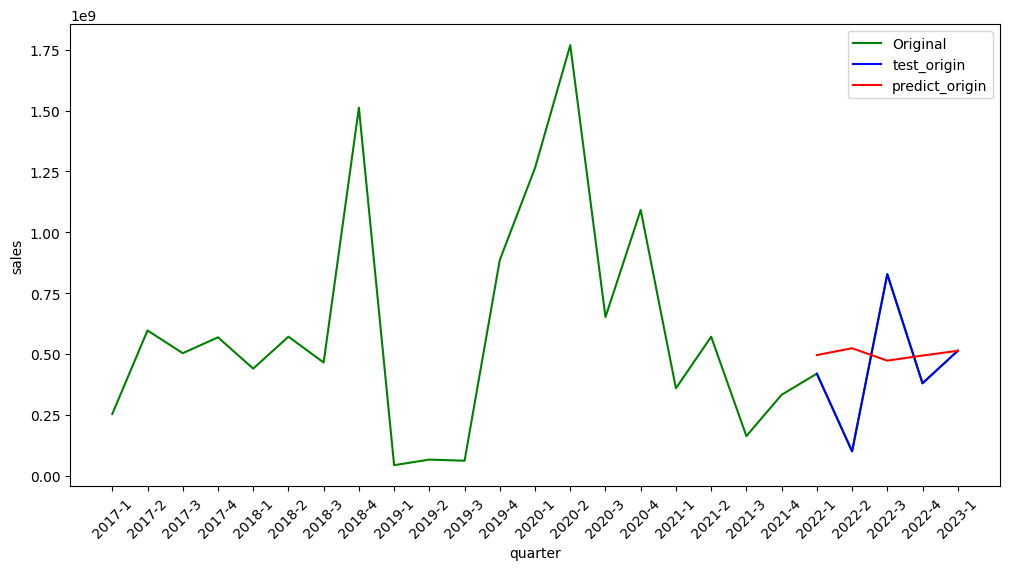

In [309]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [310]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -5.174952e+07
std      2.788792e+08
min     -4.237524e+08
25%     -1.138890e+08
50%     -7.625764e+07
75%      6.400000e+01
max      3.551514e+08
dtype: float64

In [311]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 37ms/step
[[0.21057847]]
--------------------------------------------------------------------------------
예측된 매출  : 406119104.0 


### 성장성

In [312]:
### X / y 데이터 생성
X = sin_banchan[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_banchan.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   2.532528e+08 -2.781418e+07   0.000000
1   5.962730e+08  1.035614e+07 -10.526316
2   5.028207e+08  4.880673e+05   5.263158
3   5.680562e+08  1.091515e+06   0.000000
4   4.395016e+08 -1.028010e+07   5.000000
5   5.706522e+08 -5.139073e+06   0.000000
6   4.646231e+08 -1.227974e+07   0.000000
7   1.511827e+09  2.135887e+07   0.000000
8   4.270503e+07 -2.969063e+07  -5.882353
9   6.564563e+07 -2.721471e+07  10.526316
10  6.093610e+07 -3.128562e+07   9.523810
11  8.857564e+08 -3.810712e+07   8.695652
12  1.263882e+09  8.146730e+06 -11.764706
13  1.768494e+09  2.029983e+07  14.285714
14  6.514380e+08 -3.715953e+07  -5.000000
15  1.091145e+09 -3.417501e+07   0.000000
16  3.587254e+08 -4.008365e+07  -5.263158
17  5.705410e+08 -3.433309e+07   0.000000
18  1.623392e+08 -5.191749e+07   0.000000
19  3.319503e+08 -4.806462e+07   5.000000
20  4.188492e+08 -4.511257e+07   0.000000
21  9.944297e+07 -6.446988e+07   0.000000
22  8.274017e+08 -2.896272e+07   5

In [313]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [314]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.19497788 0.1019804  0.0475382 ]
 [0.27230658 0.48470057 0.36750844]]


In [315]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [316]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_45 (LSTM)              (None, 32)                12416     
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [317]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1195
Epoch 1: val_loss improved from inf to 0.01049, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1195 - val_loss: 0.0105
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1147
Epoch 2: val_loss improved from 0.01049 to 0.00854, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.1147 - val_loss: 0.0085
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1102
Epoch 3: val_loss improved from 0.00854 to 0.00685, saving model to stock_model.h5
1/1 [==============================] - 0s 68ms/step - loss: 0.1102 - val_loss: 0.0069
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1061
Epoch 4: val_loss improved from 0.00685 to 0.00541, saving model to stock_model.h5
1/1 [==============================] - 0s 69ms/step - loss: 0.1061 - val_loss: 0.0054
Epoch 5/100
1/1 [=================

In [318]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 589ms/step
[[0.08032961]
 [0.08327272]
 [0.07690469]
 [0.07984323]
 [0.0769324 ]]


In [319]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.085027,0.080330
2022-2,0.014418,0.083273
2022-3,0.571571,0.076905
2022-4,0.029643,0.079843
2023-1,0.067251,0.076932


In [320]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 3].values       # 성장성이 sin_banchan의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.085027,0.080330,1.261783,1.193635,0.068147
2022-2,0.014418,0.083273,0.237420,1.236333,-0.998913
2022-3,0.571571,0.076905,8.320364,1.143948,7.176416
2022-4,0.029643,0.079843,0.458297,1.186579,-0.728282
2023-1,0.067251,0.076932,1.003892,1.144350,-0.140458


In [321]:
df_test = df_test.reset_index()

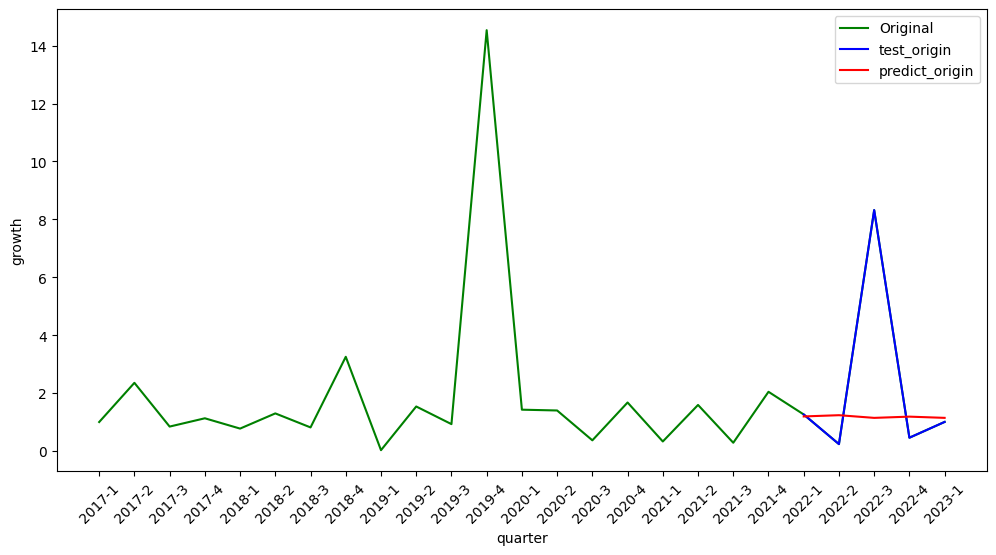

In [322]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [323]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     1.075382
std      3.437707
min     -0.998913
25%     -0.728282
50%     -0.140458
75%      0.068147
max      7.176416
dtype: float64

In [324]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 18ms/step
[[0.06201839]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9279839396476746 


### 시장성

In [325]:
### X / y 데이터 생성
X = sin_banchan[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_banchan.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액        성장성     순점포증감률
0   2.532528e+08   1.000000   0.000000
1   5.962730e+08   2.354458 -10.526316
2   5.028207e+08   0.843273   5.263158
3   5.680562e+08   1.129739   0.000000
4   4.395016e+08   0.773694   5.000000
5   5.706522e+08   1.298408   0.000000
6   4.646231e+08   0.814197   0.000000
7   1.511827e+09   3.253879   0.000000
8   4.270503e+07   0.028247  -5.882353
9   6.564563e+07   1.537187  10.526316
10  6.093610e+07   0.928258   9.523810
11  8.857564e+08  14.535823   8.695652
12  1.263882e+09   1.426895 -11.764706
13  1.768494e+09   1.399256  14.285714
14  6.514380e+08   0.368357  -5.000000
15  1.091145e+09   1.674979   0.000000
16  3.587254e+08   0.328760  -5.263158
17  5.705410e+08   1.590467   0.000000
18  1.623392e+08   0.284536   0.000000
19  3.319503e+08   2.044794   5.000000
20  4.188492e+08   1.261783   0.000000
21  9.944297e+07   0.237420   0.000000
22  8.274017e+08   8.320364   5.000000
23  3.791958e+08   0.458297 -10.526316
24  5.126488e+08   1.0038

In [326]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [327]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.19497788 0.02964312 0.0475382 ]
 [0.27230658 0.06725068 0.36750844]]


In [328]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [329]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_47 (LSTM)              (None, 32)                12416     
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [330]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4121
Epoch 1: val_loss improved from inf to 0.28155, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4121 - val_loss: 0.2816
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4006
Epoch 2: val_loss improved from 0.28155 to 0.27173, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.4006 - val_loss: 0.2717
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3894
Epoch 3: val_loss improved from 0.27173 to 0.26216, saving model to stock_model.h5
1/1 [==============================] - 0s 118ms/step - loss: 0.3894 - val_loss: 0.2622
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3783
Epoch 4: val_loss improved from 0.26216 to 0.25280, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.3783 - val_loss: 0.2528
Epoch 5/100
1/1 [================

In [331]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 598ms/step
[[0.38942158]
 [0.42723927]
 [0.37876964]
 [0.41083893]
 [0.43303773]]


In [332]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.225534,0.389422
2022-2,0.000000,0.427239
2022-3,0.413698,0.378770
2022-4,0.101980,0.410839
2023-1,0.484701,0.433038


In [333]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 5].values       # 시장성이 sin_banchan의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.225534,0.389422,-4.511257e+07,-31046316.0,-1.406626e+07
2022-2,0.000000,0.427239,-6.446988e+07,-27800470.0,-3.666941e+07
2022-3,0.413698,0.378770,-2.896272e+07,-31960558.0,2.997835e+06
2022-4,0.101980,0.410839,-5.571703e+07,-29208092.0,-2.650894e+07
2023-1,0.484701,0.433038,-2.286864e+07,-27302796.0,4.434158e+06


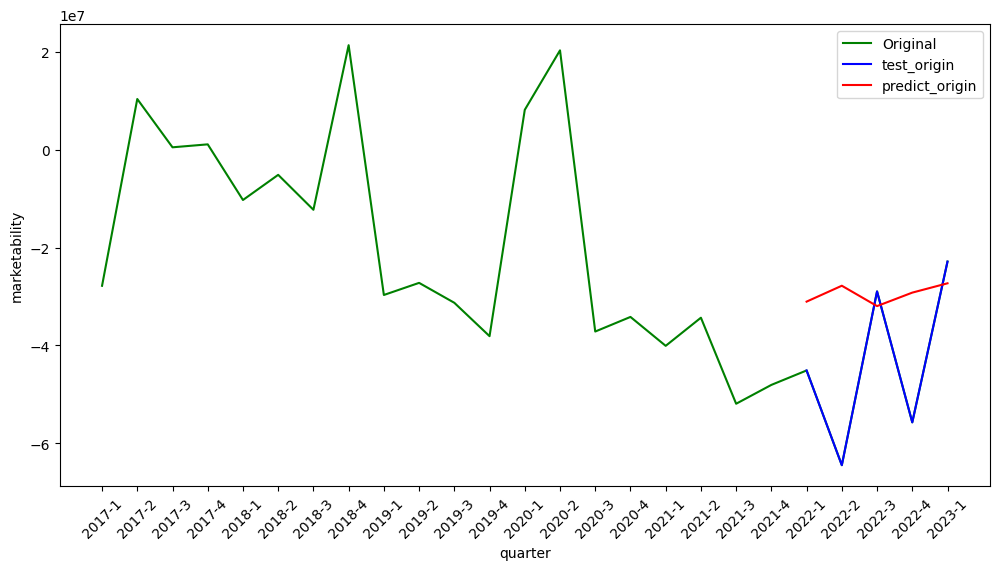

In [334]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [335]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -1.396252e+07
std      1.802164e+07
min     -3.666941e+07
25%     -2.650894e+07
50%     -1.406626e+07
75%      2.997835e+06
max      4.434158e+06
dtype: float64

In [336]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 19ms/step
[[0.29840258]]
--------------------------------------------------------------------------------
예측된 시장성  : -38858364.0 


### 순점포증감률

In [337]:
### X / y 데이터 생성
X = sin_banchan[['분기당_매출_금액', '성장성', '시장성']]
y = sin_banchan.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액        성장성           시장성
0   2.532528e+08   1.000000 -2.781418e+07
1   5.962730e+08   2.354458  1.035614e+07
2   5.028207e+08   0.843273  4.880673e+05
3   5.680562e+08   1.129739  1.091515e+06
4   4.395016e+08   0.773694 -1.028010e+07
5   5.706522e+08   1.298408 -5.139073e+06
6   4.646231e+08   0.814197 -1.227974e+07
7   1.511827e+09   3.253879  2.135887e+07
8   4.270503e+07   0.028247 -2.969063e+07
9   6.564563e+07   1.537187 -2.721471e+07
10  6.093610e+07   0.928258 -3.128562e+07
11  8.857564e+08  14.535823 -3.810712e+07
12  1.263882e+09   1.426895  8.146730e+06
13  1.768494e+09   1.399256  2.029983e+07
14  6.514380e+08   0.368357 -3.715953e+07
15  1.091145e+09   1.674979 -3.417501e+07
16  3.587254e+08   0.328760 -4.008365e+07
17  5.705410e+08   1.590467 -3.433309e+07
18  1.623392e+08   0.284536 -5.191749e+07
19  3.319503e+08   2.044794 -4.806462e+07
20  4.188492e+08   1.261783 -4.511257e+07
21  9.944297e+07   0.237420 -6.446988e+07
22  8.274017e+08   8.320364 -2.896

In [338]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [339]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.19497788 0.02964312 0.1019804 ]
 [0.27230658 0.06725068 0.48470057]]


In [340]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [341]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_49 (LSTM)              (None, 32)                12416     
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [342]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3859
Epoch 1: val_loss improved from inf to 0.27555, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3859 - val_loss: 0.2755
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3733
Epoch 2: val_loss improved from 0.27555 to 0.26638, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.3733 - val_loss: 0.2664
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3611
Epoch 3: val_loss improved from 0.26638 to 0.25744, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.3611 - val_loss: 0.2574
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3491
Epoch 4: val_loss improved from 0.25744 to 0.24870, saving model to stock_model.h5
1/1 [==============================] - 0s 66ms/step - loss: 0.3491 - val_loss: 0.2487
Epoch 5/100
1/1 [=================

In [343]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 563ms/step
[[0.27398068]
 [0.3015478 ]
 [0.2783216 ]
 [0.2853182 ]
 [0.37717533]]


In [344]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.451613,0.273981
2022-2,0.451613,0.301548
2022-3,0.643548,0.278322
2022-4,0.047538,0.285318
2023-1,0.367508,0.377175


In [345]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_banchan의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.451613,0.273981,0.000000,-4.627394,4.627394
2022-2,0.451613,0.301548,0.000000,-3.909259,3.909259
2022-3,0.643548,0.278322,5.000000,-4.514311,9.514311
2022-4,0.047538,0.285318,-10.526316,-4.332047,-6.194269
2023-1,0.367508,0.377175,-2.190957,-1.939130,-0.251827


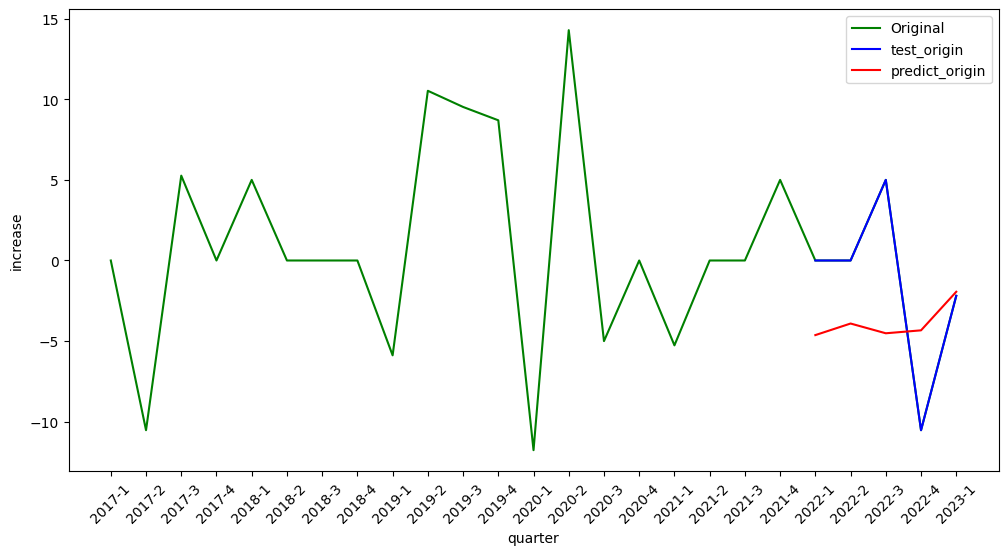

In [346]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [347]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     2.320974
std      5.888866
min     -6.194269
25%     -0.251827
50%      3.909259
75%      4.627394
max      9.514311
dtype: float64

In [348]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 19ms/step
[[0.31022644]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -3.6831767559051514 


### 추가


In [349]:
sin_banchan.loc[25] = ['2023-2', '반찬가게', sales, growth, increase, marketability]

<ipython-input-349-89efb5e51538>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_banchan.loc[25] = ['2023-2', '반찬가게', sales, growth, increase, marketability]


In [350]:
sin_banchan

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,반찬가게,2.532528e+08,1.000000,0.000000,-2.781418e+07
1,2017-2,반찬가게,5.962730e+08,2.354458,-10.526316,1.035614e+07
2,2017-3,반찬가게,5.028207e+08,0.843273,5.263158,4.880673e+05
3,2017-4,반찬가게,5.680562e+08,1.129739,0.000000,1.091515e+06
4,2018-1,반찬가게,4.395016e+08,0.773694,5.000000,-1.028010e+07
5,2018-2,반찬가게,5.706522e+08,1.298408,0.000000,-5.139073e+06
6,2018-3,반찬가게,4.646231e+08,0.814197,0.000000,-1.227974e+07
7,2018-4,반찬가게,1.511827e+09,3.253879,0.000000,2.135887e+07
8,2019-1,반찬가게,4.270503e+07,0.028247,-5.882353,-2.969063e+07
9,2019-2,반찬가게,6.564563e+07,1.537187,10.526316,-2.721471e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [351]:
################ 매출 ####################

### X / y 데이터 생성
X = sin_banchan[['성장성', '시장성', '순점포증감률']]
y = sin_banchan.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

          성장성           시장성     순점포증감률
0    1.000000 -2.781418e+07   0.000000
1    2.354458  1.035614e+07 -10.526316
2    0.843273  4.880673e+05   5.263158
3    1.129739  1.091515e+06   0.000000
4    0.773694 -1.028010e+07   5.000000
5    1.298408 -5.139073e+06   0.000000
6    0.814197 -1.227974e+07   0.000000
7    3.253879  2.135887e+07   0.000000
8    0.028247 -2.969063e+07  -5.882353
9    1.537187 -2.721471e+07  10.526316
10   0.928258 -3.128562e+07   9.523810
11  14.535823 -3.810712e+07   8.695652
12   1.426895  8.146730e+06 -11.764706
13   1.399256  2.029983e+07  14.285714
14   0.368357 -3.715953e+07  -5.000000
15   1.674979 -3.417501e+07   0.000000
16   0.328760 -4.008365e+07  -5.263158
17   1.590467 -3.433309e+07   0.000000
18   0.284536 -5.191749e+07   0.000000
19   2.044794 -4.806462e+07   5.000000
20   1.261783 -4.511257e+07   0.000000
21   0.237420 -6.446988e+07   0.000000
22   8.320364 -2.896272e+07   5.000000
23   0.458297 -5.571703e+07 -10.526316
24   1.003892 -2.286864e+

In [352]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [353]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.06725068 0.48470057 0.36750844]
 [0.0620184  0.29840256 0.31022644]]


In [354]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [355]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_51 (LSTM)              (None, 32)                12416     
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [356]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1868
Epoch 1: val_loss improved from inf to 0.22531, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.1868 - val_loss: 0.2253
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1787
Epoch 2: val_loss improved from 0.22531 to 0.21705, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1787 - val_loss: 0.2170
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1710
Epoch 3: val_loss improved from 0.21705 to 0.20907, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1710 - val_loss: 0.2091
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1637
Epoch 4: val_loss improved from 0.20907 to 0.20135, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.1637 - val_loss: 0.2014
Epoch 5/100
1/1 [=================

In [357]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 571ms/step
[[0.33906975]
 [0.29825348]
 [0.3248402 ]
 [0.3377537 ]
 [0.2376222 ]]


In [358]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.032877,0.339070
2022-3,0.454689,0.298253
2022-4,0.194978,0.324840
2023-1,0.272307,0.337754
2023-2,0.210578,0.237622


In [359]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_banchan의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.032877,0.339070,99442974.0,627867968.0,-528424994.0
2022-3,0.454689,0.298253,827401705.0,557427712.0,269973993.0
2022-4,0.194978,0.324840,379195770.0,603310784.0,-224115014.0
2023-1,0.272307,0.337754,512648800.0,625596800.0,-112948000.0
2023-2,0.210578,0.237622,406119104.0,452790880.0,-46671776.0


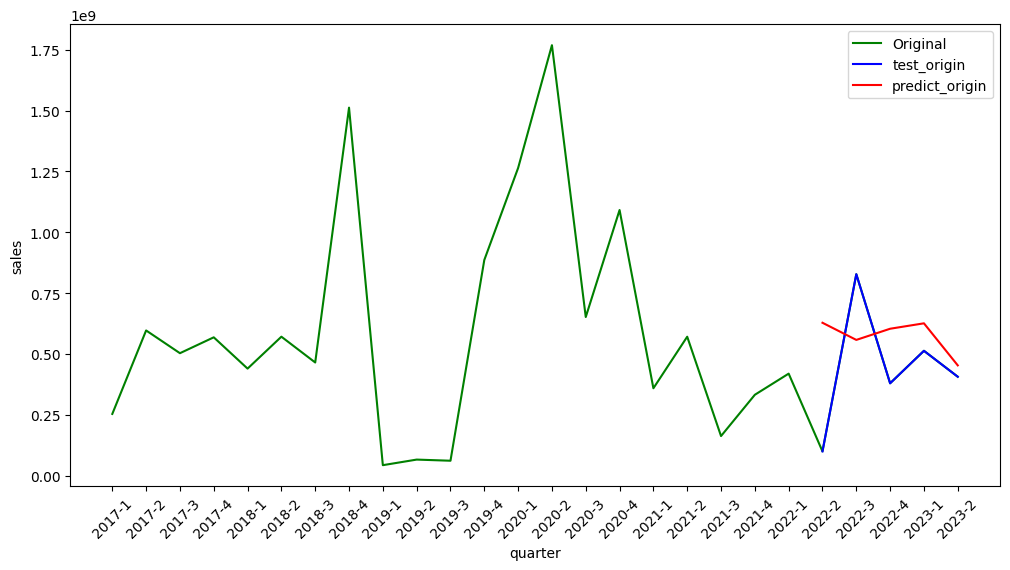

In [360]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [361]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -1.284372e+08
std      2.893102e+08
min     -5.284250e+08
25%     -2.241150e+08
50%     -1.129480e+08
75%     -4.667178e+07
max      2.699740e+08
dtype: float64

In [362]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.3062045]]
--------------------------------------------------------------------------------
예측된 매출  : 571149504.0 


### 성장성

In [363]:
X = sin_banchan[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_banchan.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   2.532528e+08 -2.781418e+07   0.000000
1   5.962730e+08  1.035614e+07 -10.526316
2   5.028207e+08  4.880673e+05   5.263158
3   5.680562e+08  1.091515e+06   0.000000
4   4.395016e+08 -1.028010e+07   5.000000
5   5.706522e+08 -5.139073e+06   0.000000
6   4.646231e+08 -1.227974e+07   0.000000
7   1.511827e+09  2.135887e+07   0.000000
8   4.270503e+07 -2.969063e+07  -5.882353
9   6.564563e+07 -2.721471e+07  10.526316
10  6.093610e+07 -3.128562e+07   9.523810
11  8.857564e+08 -3.810712e+07   8.695652
12  1.263882e+09  8.146730e+06 -11.764706
13  1.768494e+09  2.029983e+07  14.285714
14  6.514380e+08 -3.715953e+07  -5.000000
15  1.091145e+09 -3.417501e+07   0.000000
16  3.587254e+08 -4.008365e+07  -5.263158
17  5.705410e+08 -3.433309e+07   0.000000
18  1.623392e+08 -5.191749e+07   0.000000
19  3.319503e+08 -4.806462e+07   5.000000
20  4.188492e+08 -4.511257e+07   0.000000
21  9.944297e+07 -6.446988e+07   0.000000
22  8.274017e+08 -2.896272e+07   5

In [364]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [365]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.27230658 0.48470057 0.36750844]
 [0.21057847 0.29840256 0.31022644]]


In [366]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [367]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_53 (LSTM)              (None, 32)                12416     
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [368]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1100
Epoch 1: val_loss improved from inf to 0.01001, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1100 - val_loss: 0.0100
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1054
Epoch 2: val_loss improved from 0.01001 to 0.00817, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.1054 - val_loss: 0.0082
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1010
Epoch 3: val_loss improved from 0.00817 to 0.00657, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.1010 - val_loss: 0.0066
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0970
Epoch 4: val_loss improved from 0.00657 to 0.00521, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.0970 - val_loss: 0.0052
Epoch 5/100
1/1 [=================

In [369]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 596ms/step
[[0.08355471]
 [0.07713222]
 [0.08014221]
 [0.0771246 ]
 [0.06204128]]


In [370]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.014418,0.083555
2022-3,0.571571,0.077132
2022-4,0.029643,0.080142
2023-1,0.067251,0.077125
2023-2,0.062018,0.062041


In [371]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 3].values       # 성장성이 sin_banchan의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.014418,0.083555,0.237420,1.240424,-1.003004
2022-3,0.571571,0.077132,8.320364,1.147249,7.173115
2022-4,0.029643,0.080142,0.458297,1.190917,-0.732620
2023-1,0.067251,0.077125,1.003892,1.147138,-0.143247
2023-2,0.062018,0.062041,0.927984,0.928316,-0.000332


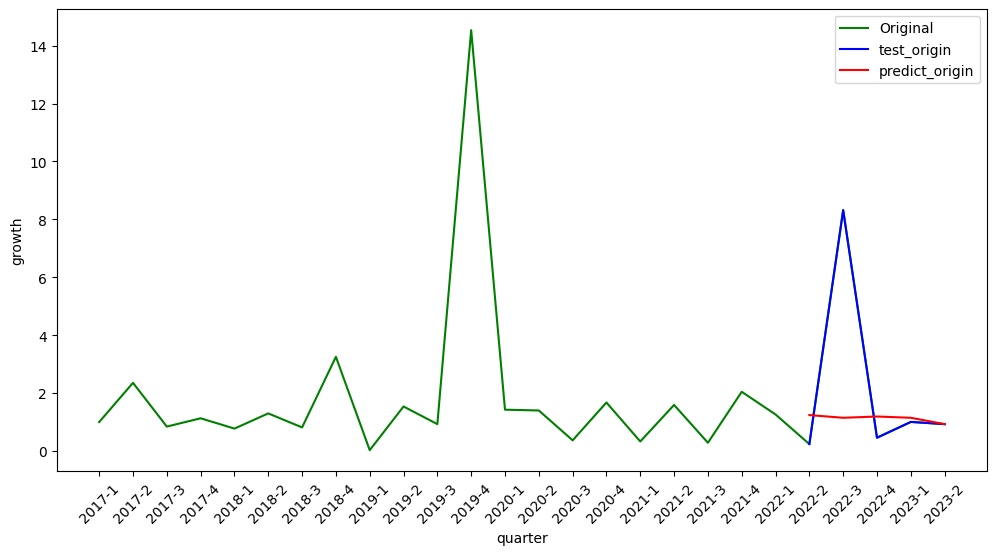

In [372]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [373]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     1.058782
std      3.442809
min     -1.003004
25%     -0.732620
50%     -0.143247
75%     -0.000332
max      7.173115
dtype: float64

In [374]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.07351723]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.094804048538208 


### 시장성

In [375]:
### X / y 데이터 생성
X = sin_banchan[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_banchan.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액        성장성     순점포증감률
0   2.532528e+08   1.000000   0.000000
1   5.962730e+08   2.354458 -10.526316
2   5.028207e+08   0.843273   5.263158
3   5.680562e+08   1.129739   0.000000
4   4.395016e+08   0.773694   5.000000
5   5.706522e+08   1.298408   0.000000
6   4.646231e+08   0.814197   0.000000
7   1.511827e+09   3.253879   0.000000
8   4.270503e+07   0.028247  -5.882353
9   6.564563e+07   1.537187  10.526316
10  6.093610e+07   0.928258   9.523810
11  8.857564e+08  14.535823   8.695652
12  1.263882e+09   1.426895 -11.764706
13  1.768494e+09   1.399256  14.285714
14  6.514380e+08   0.368357  -5.000000
15  1.091145e+09   1.674979   0.000000
16  3.587254e+08   0.328760  -5.263158
17  5.705410e+08   1.590467   0.000000
18  1.623392e+08   0.284536   0.000000
19  3.319503e+08   2.044794   5.000000
20  4.188492e+08   1.261783   0.000000
21  9.944297e+07   0.237420   0.000000
22  8.274017e+08   8.320364   5.000000
23  3.791958e+08   0.458297 -10.526316
24  5.126488e+08   1.0038

In [376]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [377]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.27230658 0.06725068 0.36750844]
 [0.21057847 0.0620184  0.31022644]]


In [378]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [379]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_55 (LSTM)              (None, 32)                12416     
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [380]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4440
Epoch 1: val_loss improved from inf to 0.19532, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4440 - val_loss: 0.1953
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4315
Epoch 2: val_loss improved from 0.19532 to 0.18767, saving model to stock_model.h5
1/1 [==============================] - 0s 67ms/step - loss: 0.4315 - val_loss: 0.1877
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4193
Epoch 3: val_loss improved from 0.18767 to 0.18024, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.4193 - val_loss: 0.1802
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4073
Epoch 4: val_loss improved from 0.18024 to 0.17303, saving model to stock_model.h5
1/1 [==============================] - 0s 65ms/step - loss: 0.4073 - val_loss: 0.1730
Epoch 5/100
1/1 [=================

In [381]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 567ms/step
[[0.37575686]
 [0.33337578]
 [0.36270422]
 [0.37714374]
 [0.26179704]]


In [382]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.000000,0.375757
2022-3,0.413698,0.333376
2022-4,0.101980,0.362704
2023-1,0.484701,0.377144
2023-2,0.298403,0.261797


In [383]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 5].values       # 시장성이 sin_banchan의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.000000,0.375757,-6.446988e+07,-32219142.0,-3.225074e+07
2022-3,0.413698,0.333376,-2.896272e+07,-35856656.0,6.893933e+06
2022-4,0.101980,0.362704,-5.571703e+07,-33339434.0,-2.237760e+07
2023-1,0.484701,0.377144,-2.286864e+07,-32100108.0,9.231470e+06
2023-2,0.298403,0.261797,-3.885836e+07,-42000172.0,3.141808e+06


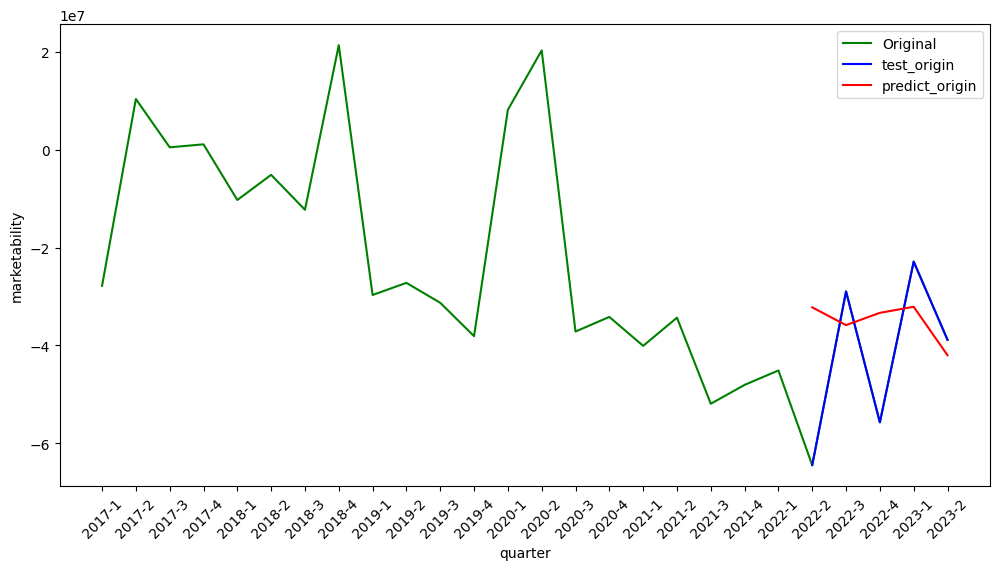

In [384]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [385]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -7.072226e+06
std      1.893015e+07
min     -3.225074e+07
25%     -2.237760e+07
50%      3.141808e+06
75%      6.893933e+06
max      9.231470e+06
dtype: float64

In [386]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 20ms/step
[[0.31820157]]
--------------------------------------------------------------------------------
예측된 시장성  : -37159040.0 


### 순점포증감률

In [387]:
### X / y 데이터 생성
X = sin_banchan[['분기당_매출_금액', '성장성', '시장성']]
y = sin_banchan.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액        성장성           시장성
0   2.532528e+08   1.000000 -2.781418e+07
1   5.962730e+08   2.354458  1.035614e+07
2   5.028207e+08   0.843273  4.880673e+05
3   5.680562e+08   1.129739  1.091515e+06
4   4.395016e+08   0.773694 -1.028010e+07
5   5.706522e+08   1.298408 -5.139073e+06
6   4.646231e+08   0.814197 -1.227974e+07
7   1.511827e+09   3.253879  2.135887e+07
8   4.270503e+07   0.028247 -2.969063e+07
9   6.564563e+07   1.537187 -2.721471e+07
10  6.093610e+07   0.928258 -3.128562e+07
11  8.857564e+08  14.535823 -3.810712e+07
12  1.263882e+09   1.426895  8.146730e+06
13  1.768494e+09   1.399256  2.029983e+07
14  6.514380e+08   0.368357 -3.715953e+07
15  1.091145e+09   1.674979 -3.417501e+07
16  3.587254e+08   0.328760 -4.008365e+07
17  5.705410e+08   1.590467 -3.433309e+07
18  1.623392e+08   0.284536 -5.191749e+07
19  3.319503e+08   2.044794 -4.806462e+07
20  4.188492e+08   1.261783 -4.511257e+07
21  9.944297e+07   0.237420 -6.446988e+07
22  8.274017e+08   8.320364 -2.896

In [388]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [389]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.27230658 0.06725068 0.48470057]
 [0.21057847 0.0620184  0.29840256]]


In [390]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [391]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_57 (LSTM)              (None, 32)                12416     
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [392]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3508
Epoch 1: val_loss improved from inf to 0.30085, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.3508 - val_loss: 0.3008
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3394
Epoch 2: val_loss improved from 0.30085 to 0.29094, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3394 - val_loss: 0.2909
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3283
Epoch 3: val_loss improved from 0.29094 to 0.28125, saving model to stock_model.h5
1/1 [==============================] - 0s 66ms/step - loss: 0.3283 - val_loss: 0.2813
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3174
Epoch 4: val_loss improved from 0.28125 to 0.27175, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.3174 - val_loss: 0.2717
Epoch 5/100
1/1 [=================

In [393]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.32808208]
 [0.30316713]
 [0.30873588]
 [0.41158792]
 [0.33753636]]


In [394]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.451613,0.328082
2022-3,0.643548,0.303167
2022-4,0.047538,0.308736
2023-1,0.367508,0.411588
2023-2,0.310226,0.337536


In [395]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_banchan의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.451613,0.328082,0.000000,-3.218030,3.218030
2022-3,0.643548,0.303167,5.000000,-3.867075,8.867075
2022-4,0.047538,0.308736,-10.526316,-3.722007,-6.804309
2023-1,0.367508,0.411588,-2.190957,-1.042668,-1.148289
2023-2,0.310226,0.337536,-3.683177,-2.971742,-0.711435


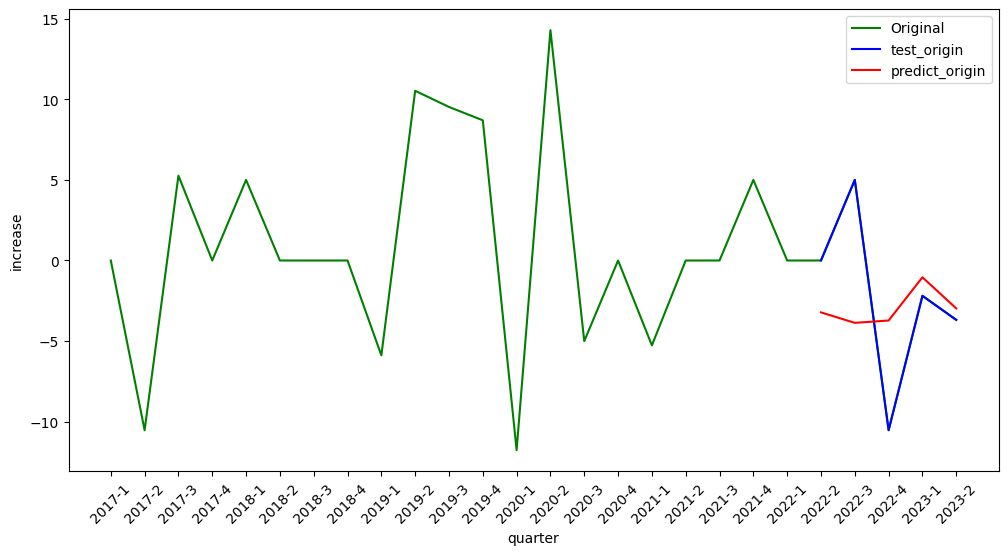

In [396]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [397]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.684214
std      5.804380
min     -6.804309
25%     -1.148289
50%     -0.711435
75%      3.218030
max      8.867075
dtype: float64

In [398]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 18ms/step
[[0.4106727]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.06650972366333 


### 추가

In [399]:
sin_banchan.loc[26] = ['2023-3', '반찬가게', sales, growth, increase, marketability]

<ipython-input-399-eb54529f3967>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_banchan.loc[26] = ['2023-3', '반찬가게', sales, growth, increase, marketability]


In [400]:
sin_banchan

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,반찬가게,2.532528e+08,1.000000,0.000000,-2.781418e+07
1,2017-2,반찬가게,5.962730e+08,2.354458,-10.526316,1.035614e+07
2,2017-3,반찬가게,5.028207e+08,0.843273,5.263158,4.880673e+05
3,2017-4,반찬가게,5.680562e+08,1.129739,0.000000,1.091515e+06
4,2018-1,반찬가게,4.395016e+08,0.773694,5.000000,-1.028010e+07
5,2018-2,반찬가게,5.706522e+08,1.298408,0.000000,-5.139073e+06
6,2018-3,반찬가게,4.646231e+08,0.814197,0.000000,-1.227974e+07
7,2018-4,반찬가게,1.511827e+09,3.253879,0.000000,2.135887e+07
8,2019-1,반찬가게,4.270503e+07,0.028247,-5.882353,-2.969063e+07
9,2019-2,반찬가게,6.564563e+07,1.537187,10.526316,-2.721471e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [401]:
### X / y 데이터 생성
X = sin_banchan[['성장성', '시장성', '순점포증감률']]
y = sin_banchan.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

          성장성           시장성     순점포증감률
0    1.000000 -2.781418e+07   0.000000
1    2.354458  1.035614e+07 -10.526316
2    0.843273  4.880673e+05   5.263158
3    1.129739  1.091515e+06   0.000000
4    0.773694 -1.028010e+07   5.000000
5    1.298408 -5.139073e+06   0.000000
6    0.814197 -1.227974e+07   0.000000
7    3.253879  2.135887e+07   0.000000
8    0.028247 -2.969063e+07  -5.882353
9    1.537187 -2.721471e+07  10.526316
10   0.928258 -3.128562e+07   9.523810
11  14.535823 -3.810712e+07   8.695652
12   1.426895  8.146730e+06 -11.764706
13   1.399256  2.029983e+07  14.285714
14   0.368357 -3.715953e+07  -5.000000
15   1.674979 -3.417501e+07   0.000000
16   0.328760 -4.008365e+07  -5.263158
17   1.590467 -3.433309e+07   0.000000
18   0.284536 -5.191749e+07   0.000000
19   2.044794 -4.806462e+07   5.000000
20   1.261783 -4.511257e+07   0.000000
21   0.237420 -6.446988e+07   0.000000
22   8.320364 -2.896272e+07   5.000000
23   0.458297 -5.571703e+07 -10.526316
24   1.003892 -2.286864e+

In [402]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [403]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.0620184  0.29840256 0.31022644]
 [0.07351723 0.31820156 0.41067269]]


In [404]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [405]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_59 (LSTM)              (None, 32)                12416     
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [406]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2598
Epoch 1: val_loss improved from inf to 0.09558, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2598 - val_loss: 0.0956
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2504
Epoch 2: val_loss improved from 0.09558 to 0.09014, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2504 - val_loss: 0.0901
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2414
Epoch 3: val_loss improved from 0.09014 to 0.08496, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.2414 - val_loss: 0.0850
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2327
Epoch 4: val_loss improved from 0.08496 to 0.08000, saving model to stock_model.h5
1/1 [==============================] - 0s 59ms/step - loss: 0.2327 - val_loss: 0.0800
Epoch 5/100
1/1 [=================

In [407]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 776ms/step
[[0.23026608]
 [0.24990934]
 [0.26301777]
 [0.19022632]
 [0.2391671 ]]


In [408]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.454689,0.230266
2022-4,0.194978,0.249909
2023-1,0.272307,0.263018
2023-2,0.210578,0.190226
2023-3,0.306205,0.239167


In [409]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_banchan의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.454689,0.230266,827401705.0,440095744.0,387305961.0
2022-4,0.194978,0.249909,379195770.0,473995904.0,-94800134.0
2023-1,0.272307,0.263018,512648800.0,496618304.0,16030496.0
2023-2,0.210578,0.190226,406119104.0,370995584.0,35123520.0
2023-3,0.306205,0.239167,571149504.0,455457056.0,115692448.0


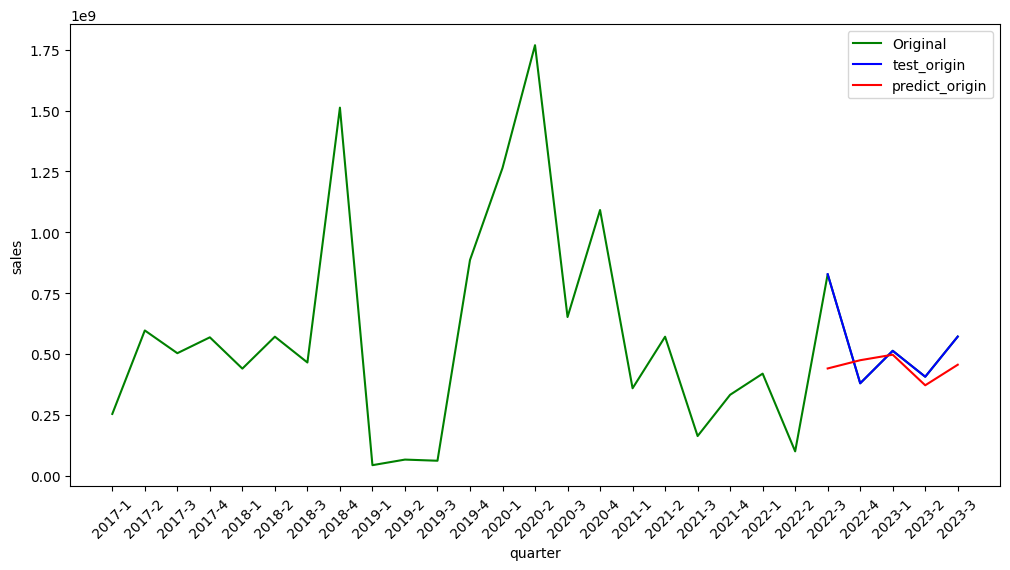

In [410]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [411]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     9.187046e+07
std      1.814300e+08
min     -9.480013e+07
25%      1.603050e+07
50%      3.512352e+07
75%      1.156924e+08
max      3.873060e+08
dtype: float64

In [412]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.22814144]]
--------------------------------------------------------------------------------
예측된 매출  : 436429088.0 


### 성장성

In [413]:
X = sin_banchan[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_banchan.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   2.532528e+08 -2.781418e+07   0.000000
1   5.962730e+08  1.035614e+07 -10.526316
2   5.028207e+08  4.880673e+05   5.263158
3   5.680562e+08  1.091515e+06   0.000000
4   4.395016e+08 -1.028010e+07   5.000000
5   5.706522e+08 -5.139073e+06   0.000000
6   4.646231e+08 -1.227974e+07   0.000000
7   1.511827e+09  2.135887e+07   0.000000
8   4.270503e+07 -2.969063e+07  -5.882353
9   6.564563e+07 -2.721471e+07  10.526316
10  6.093610e+07 -3.128562e+07   9.523810
11  8.857564e+08 -3.810712e+07   8.695652
12  1.263882e+09  8.146730e+06 -11.764706
13  1.768494e+09  2.029983e+07  14.285714
14  6.514380e+08 -3.715953e+07  -5.000000
15  1.091145e+09 -3.417501e+07   0.000000
16  3.587254e+08 -4.008365e+07  -5.263158
17  5.705410e+08 -3.433309e+07   0.000000
18  1.623392e+08 -5.191749e+07   0.000000
19  3.319503e+08 -4.806462e+07   5.000000
20  4.188492e+08 -4.511257e+07   0.000000
21  9.944297e+07 -6.446988e+07   0.000000
22  8.274017e+08 -2.896272e+07   5

In [414]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [415]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.21057847 0.29840256 0.31022644]
 [0.30620452 0.31820156 0.41067269]]


In [416]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [417]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_61 (LSTM)              (None, 32)                12416     
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [418]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1021
Epoch 1: val_loss improved from inf to 0.00842, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1021 - val_loss: 0.0084
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0977
Epoch 2: val_loss improved from 0.00842 to 0.00684, saving model to stock_model.h5
1/1 [==============================] - 0s 65ms/step - loss: 0.0977 - val_loss: 0.0068
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0935
Epoch 3: val_loss improved from 0.00684 to 0.00551, saving model to stock_model.h5
1/1 [==============================] - 0s 58ms/step - loss: 0.0935 - val_loss: 0.0055
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0897
Epoch 4: val_loss improved from 0.00551 to 0.00440, saving model to stock_model.h5
1/1 [==============================] - 0s 68ms/step - loss: 0.0897 - val_loss: 0.0044
Epoch 5/100
1/1 [=================

In [419]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 557ms/step
[[0.0680756 ]
 [0.07058214]
 [0.06763068]
 [0.05455478]
 [0.06395706]]


In [420]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.571571,0.068076
2022-4,0.029643,0.070582
2023-1,0.067251,0.067631
2023-2,0.062018,0.054555
2023-3,0.073517,0.063957


In [421]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 3].values       # 성장성이 sin_banchan의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.571571,0.068076,8.320364,1.015859,7.304504
2022-4,0.029643,0.070582,0.458297,1.052223,-0.593926
2023-1,0.067251,0.067631,1.003892,1.009405,-0.005513
2023-2,0.062018,0.054555,0.927984,0.819705,0.108279
2023-3,0.073517,0.063957,1.094804,0.956109,0.138695


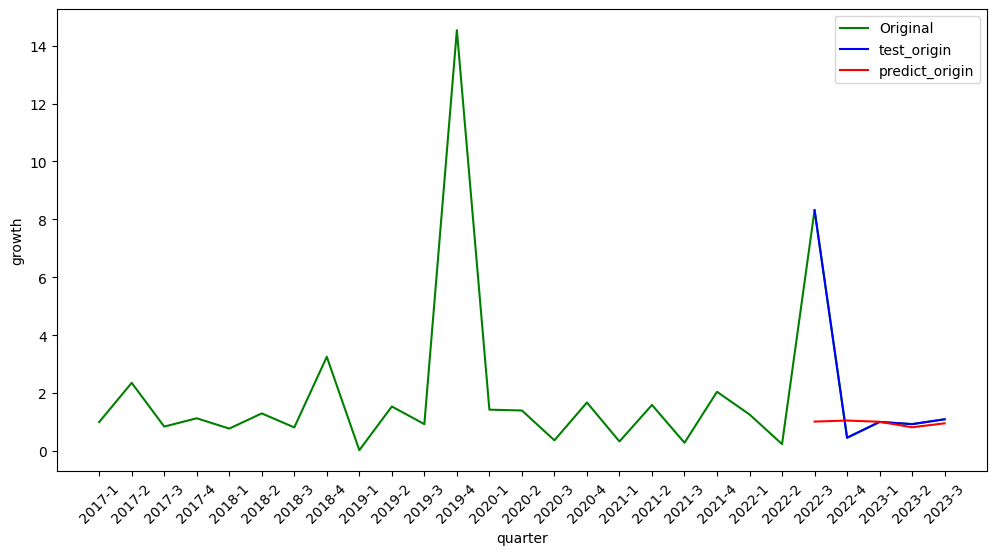

In [422]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [423]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     1.390408
std      3.319388
min     -0.593926
25%     -0.005513
50%      0.108279
75%      0.138695
max      7.304504
dtype: float64

In [424]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 21ms/step
[[0.06349505]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9494065642356873 


###시장성

In [425]:
### X / y 데이터 생성
X = sin_banchan[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_banchan.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액        성장성     순점포증감률
0   2.532528e+08   1.000000   0.000000
1   5.962730e+08   2.354458 -10.526316
2   5.028207e+08   0.843273   5.263158
3   5.680562e+08   1.129739   0.000000
4   4.395016e+08   0.773694   5.000000
5   5.706522e+08   1.298408   0.000000
6   4.646231e+08   0.814197   0.000000
7   1.511827e+09   3.253879   0.000000
8   4.270503e+07   0.028247  -5.882353
9   6.564563e+07   1.537187  10.526316
10  6.093610e+07   0.928258   9.523810
11  8.857564e+08  14.535823   8.695652
12  1.263882e+09   1.426895 -11.764706
13  1.768494e+09   1.399256  14.285714
14  6.514380e+08   0.368357  -5.000000
15  1.091145e+09   1.674979   0.000000
16  3.587254e+08   0.328760  -5.263158
17  5.705410e+08   1.590467   0.000000
18  1.623392e+08   0.284536   0.000000
19  3.319503e+08   2.044794   5.000000
20  4.188492e+08   1.261783   0.000000
21  9.944297e+07   0.237420   0.000000
22  8.274017e+08   8.320364   5.000000
23  3.791958e+08   0.458297 -10.526316
24  5.126488e+08   1.0038

In [426]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [427]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.21057847 0.0620184  0.31022644]
 [0.30620452 0.07351723 0.41067269]]


In [428]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [429]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_63 (LSTM)              (None, 32)                12416     
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [430]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4940
Epoch 1: val_loss improved from inf to 0.06780, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.4940 - val_loss: 0.0678
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4806
Epoch 2: val_loss improved from 0.06780 to 0.06319, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.4806 - val_loss: 0.0632
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4674
Epoch 3: val_loss improved from 0.06319 to 0.05879, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.4674 - val_loss: 0.0588
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4544
Epoch 4: val_loss improved from 0.05879 to 0.05458, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.4544 - val_loss: 0.0546
Epoch 5/100
1/1 [================

In [431]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 560ms/step
[[0.22050539]
 [0.23883879]
 [0.24394259]
 [0.17583838]
 [0.21037889]]


In [432]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.413698,0.220505
2022-4,0.101980,0.238839
2023-1,0.484701,0.243943
2023-2,0.298403,0.175838
2023-3,0.318202,0.210379


In [433]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 5].values       # 시장성이 sin_banchan의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.413698,0.220505,-2.896272e+07,-45544180.0,1.658146e+07
2022-4,0.101980,0.238839,-5.571703e+07,-43970648.0,-1.174638e+07
2023-1,0.484701,0.243943,-2.286864e+07,-43532592.0,2.066395e+07
2023-2,0.298403,0.175838,-3.885836e+07,-49377892.0,1.051953e+07
2023-3,0.318202,0.210379,-3.715904e+07,-46413328.0,9.254288e+06


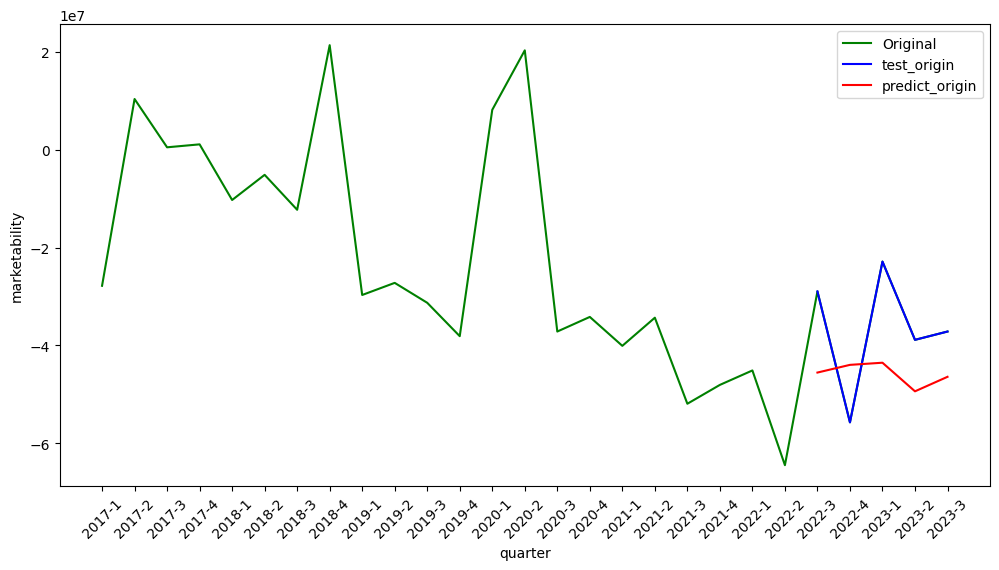

In [434]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [435]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     9.054568e+06
std      1.251297e+07
min     -1.174638e+07
25%      9.254288e+06
50%      1.051953e+07
75%      1.658146e+07
max      2.066395e+07
dtype: float64

In [436]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 25ms/step
[[0.20963621]]
--------------------------------------------------------------------------------
예측된 시장성  : -46477068.0 


### 순점포증감률

In [437]:
### X / y 데이터 생성
X = sin_banchan[['분기당_매출_금액', '성장성', '시장성']]
y = sin_banchan.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액        성장성           시장성
0   2.532528e+08   1.000000 -2.781418e+07
1   5.962730e+08   2.354458  1.035614e+07
2   5.028207e+08   0.843273  4.880673e+05
3   5.680562e+08   1.129739  1.091515e+06
4   4.395016e+08   0.773694 -1.028010e+07
5   5.706522e+08   1.298408 -5.139073e+06
6   4.646231e+08   0.814197 -1.227974e+07
7   1.511827e+09   3.253879  2.135887e+07
8   4.270503e+07   0.028247 -2.969063e+07
9   6.564563e+07   1.537187 -2.721471e+07
10  6.093610e+07   0.928258 -3.128562e+07
11  8.857564e+08  14.535823 -3.810712e+07
12  1.263882e+09   1.426895  8.146730e+06
13  1.768494e+09   1.399256  2.029983e+07
14  6.514380e+08   0.368357 -3.715953e+07
15  1.091145e+09   1.674979 -3.417501e+07
16  3.587254e+08   0.328760 -4.008365e+07
17  5.705410e+08   1.590467 -3.433309e+07
18  1.623392e+08   0.284536 -5.191749e+07
19  3.319503e+08   2.044794 -4.806462e+07
20  4.188492e+08   1.261783 -4.511257e+07
21  9.944297e+07   0.237420 -6.446988e+07
22  8.274017e+08   8.320364 -2.896

In [438]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [439]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.21057847 0.0620184  0.29840256]
 [0.30620452 0.07351723 0.31820156]]


In [440]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [441]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_65 (LSTM)              (None, 32)                12416     
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [442]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4107
Epoch 1: val_loss improved from inf to 0.19586, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4107 - val_loss: 0.1959
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3982
Epoch 2: val_loss improved from 0.19586 to 0.18816, saving model to stock_model.h5
1/1 [==============================] - 0s 66ms/step - loss: 0.3982 - val_loss: 0.1882
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3859
Epoch 3: val_loss improved from 0.18816 to 0.18067, saving model to stock_model.h5
1/1 [==============================] - 0s 63ms/step - loss: 0.3859 - val_loss: 0.1807
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3739
Epoch 4: val_loss improved from 0.18067 to 0.17336, saving model to stock_model.h5
1/1 [==============================] - 0s 69ms/step - loss: 0.3739 - val_loss: 0.1734
Epoch 5/100
1/1 [=================

In [443]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.25897694]
 [0.2677105 ]
 [0.354085  ]
 [0.28911594]
 [0.34818852]]


In [444]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.643548,0.258977
2022-4,0.047538,0.267711
2023-1,0.367508,0.354085
2023-2,0.310226,0.289116
2023-3,0.410673,0.348189


In [445]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_banchan의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.643548,0.258977,5.000000,-5.018248,10.018248
2022-4,0.047538,0.267711,-10.526316,-4.790735,-5.735581
2023-1,0.367508,0.354085,-2.190957,-2.540643,0.349686
2023-2,0.310226,0.289116,-3.683177,-4.233114,0.549937
2023-3,0.410673,0.348189,-1.066510,-2.694249,1.627739


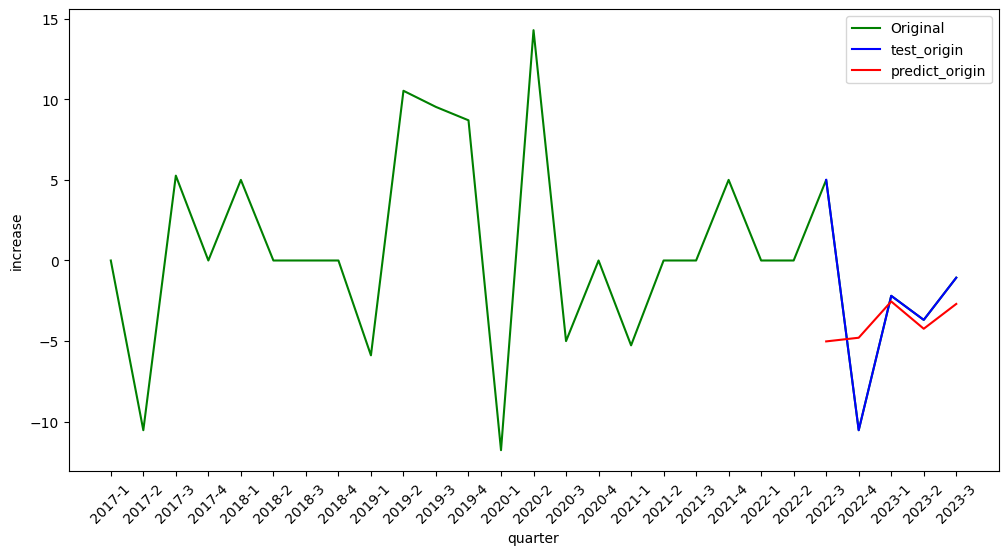

In [446]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [447]:
### error의 요약 통계량
error.describe()

count     5.000000
mean      1.362006
std       5.636070
min      -5.735581
25%       0.349686
50%       0.549937
75%       1.627739
max      10.018248
dtype: float64

In [448]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 19ms/step
[[0.31385294]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -3.588705062866211 


### 추가

In [449]:
sin_banchan.loc[27] = ['2023-4', '반찬가게', sales, growth, increase, marketability]

<ipython-input-449-ca7bbd5887d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_banchan.loc[27] = ['2023-4', '반찬가게', sales, growth, increase, marketability]


In [450]:
final_sin_banchan = sin_banchan
final_sin_banchan

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,반찬가게,2.532528e+08,1.000000,0.000000,-2.781418e+07
1,2017-2,반찬가게,5.962730e+08,2.354458,-10.526316,1.035614e+07
2,2017-3,반찬가게,5.028207e+08,0.843273,5.263158,4.880673e+05
3,2017-4,반찬가게,5.680562e+08,1.129739,0.000000,1.091515e+06
4,2018-1,반찬가게,4.395016e+08,0.773694,5.000000,-1.028010e+07
5,2018-2,반찬가게,5.706522e+08,1.298408,0.000000,-5.139073e+06
6,2018-3,반찬가게,4.646231e+08,0.814197,0.000000,-1.227974e+07
7,2018-4,반찬가게,1.511827e+09,3.253879,0.000000,2.135887e+07
8,2019-1,반찬가게,4.270503e+07,0.028247,-5.882353,-2.969063e+07
9,2019-2,반찬가게,6.564563e+07,1.537187,10.526316,-2.721471e+07


## 최종결과

In [451]:
### X / y 데이터 생성
X = sin_banchan[['성장성', '시장성', '순점포증감률']]
y = sin_banchan.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

          성장성           시장성     순점포증감률
0    1.000000 -2.781418e+07   0.000000
1    2.354458  1.035614e+07 -10.526316
2    0.843273  4.880673e+05   5.263158
3    1.129739  1.091515e+06   0.000000
4    0.773694 -1.028010e+07   5.000000
5    1.298408 -5.139073e+06   0.000000
6    0.814197 -1.227974e+07   0.000000
7    3.253879  2.135887e+07   0.000000
8    0.028247 -2.969063e+07  -5.882353
9    1.537187 -2.721471e+07  10.526316
10   0.928258 -3.128562e+07   9.523810
11  14.535823 -3.810712e+07   8.695652
12   1.426895  8.146730e+06 -11.764706
13   1.399256  2.029983e+07  14.285714
14   0.368357 -3.715953e+07  -5.000000
15   1.674979 -3.417501e+07   0.000000
16   0.328760 -4.008365e+07  -5.263158
17   1.590467 -3.433309e+07   0.000000
18   0.284536 -5.191749e+07   0.000000
19   2.044794 -4.806462e+07   5.000000
20   1.261783 -4.511257e+07   0.000000
21   0.237420 -6.446988e+07   0.000000
22   8.320364 -2.896272e+07   5.000000
23   0.458297 -5.571703e+07 -10.526316
24   1.003892 -2.286864e+

In [452]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [453]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.07351723 0.31820156 0.41067269]
 [0.06349505 0.20963622 0.31385293]]


In [454]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [455]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_67 (LSTM)              (None, 32)                12416     
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [456]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2598
Epoch 1: val_loss improved from inf to 0.10810, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2598 - val_loss: 0.1081
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2504
Epoch 2: val_loss improved from 0.10810 to 0.10241, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2504 - val_loss: 0.1024
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2414
Epoch 3: val_loss improved from 0.10241 to 0.09697, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2414 - val_loss: 0.0970
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2327
Epoch 4: val_loss improved from 0.09697 to 0.09176, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2327 - val_loss: 0.0918
Epoch 5/100
1/1 [=================

In [457]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 570ms/step
[[0.27981955]
 [0.29661965]
 [0.21139406]
 [0.2675873 ]
 [0.25480187]]


In [458]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_banchan.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.194978,0.279820
2023-1,0.272307,0.296620
2023-2,0.210578,0.211394
2023-3,0.306205,0.267587
2023-4,0.228141,0.254802


In [459]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_banchan.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_banchan의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.194978,0.279820,379195770.0,525614624.0,-146418854.0
2023-1,0.272307,0.296620,512648800.0,554608064.0,-41959264.0
2023-2,0.210578,0.211394,406119104.0,407526656.0,-1407552.0
2023-3,0.306205,0.267587,571149504.0,504504352.0,66645152.0
2023-4,0.228141,0.254802,436429088.0,482439392.0,-46010304.0


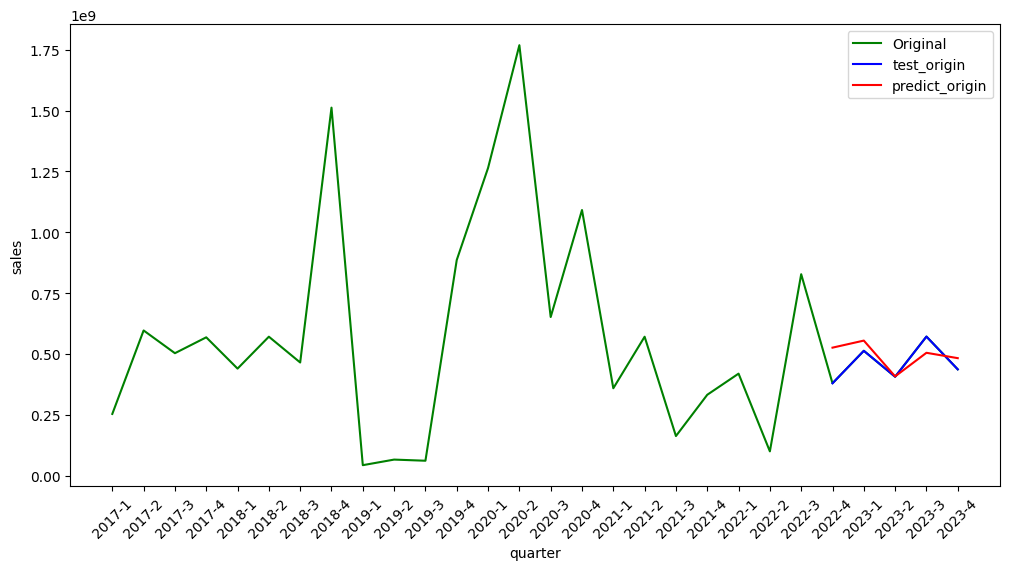

In [460]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_banchan['분기'], sin_banchan['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()